## EDA & Feature Engineering NYPL Menu Dataset

#### TO DO
- skalieren?

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re

### DISH

In [2]:
dish = pd.read_csv('data/Dish.csv')

FileNotFoundError: [Errno 2] File b'data/Dish.csv' does not exist: b'data/Dish.csv'

In [3]:
dish.description.unique()  # only nan -> can be dropped
dish = dish.drop('description', axis=1)

In [ ]:
# EDA

(0, 1500)

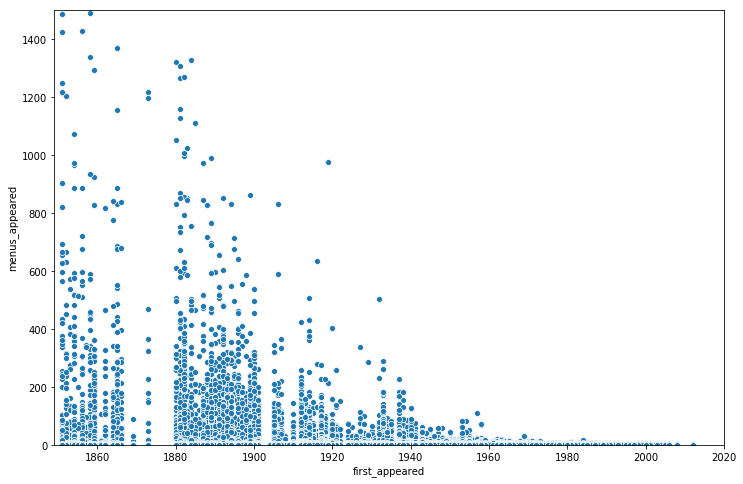

In [6]:
plt.figure(figsize=(12,8))
sns.scatterplot(dish['first_appeared'], dish['menus_appeared'])
axes = plt.gca()
axes.set_xlim([1849,2020])
axes.set_ylim([0,1500])

In [53]:
soup = dish[dish['name'].str.contains('avocado')]  #pizza #coffee #avocado #steak # salad #beer

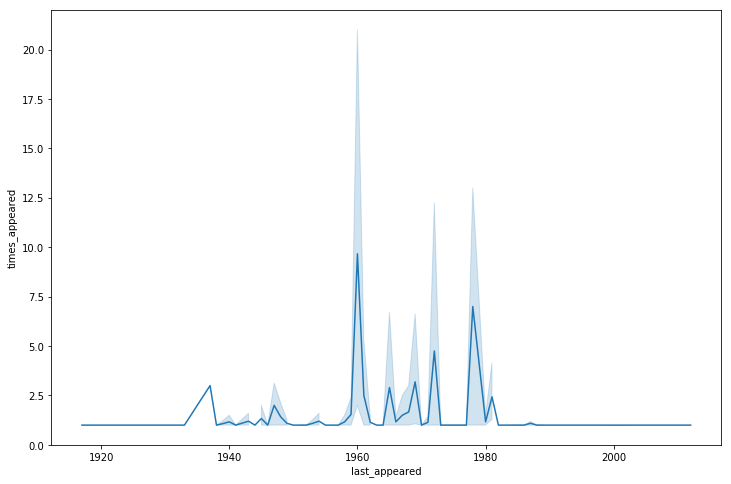

In [54]:
plt.figure(figsize=(12,8))
sns.lineplot(soup['last_appeared'], soup['times_appeared'])

### menus_appeared & times_appeared
Delete rows that have values of zero

In [4]:
dish = dish.drop((dish[dish['menus_appeared'] == 0].index))

In [5]:
dish = dish.drop(dish[dish['times_appeared'] == 0].index)

### first_appeared

In [6]:
# drop rows where first_appeared is 0, 1 or 2928
dish = dish.drop(dish[dish['first_appeared'] == 0].index)

In [7]:
dish = dish.drop(dish[dish['first_appeared'] == 1].index)
dish = dish.drop(dish[dish['first_appeared'] > 2020].index)
dish['first_appeared'].unique()

array([1897, 1895, 1893, 1900, 1881, 1854, 1899, 1858, 1880, 1856, 1865,
       1852, 1851, 1898, 1862, 1901, 1873, 1896, 1889, 1859, 1894, 1884,
       1892, 1890, 1853, 1882, 1883, 1888, 1887, 1891, 1885, 1864, 1866,
       1886, 1907, 1855, 1857, 1906, 1905, 1944, 1914, 1918, 1861, 1939,
       1910, 1946, 1957, 1933, 1959, 1928, 1869, 1942, 1956, 1964, 1949,
       1921, 1948, 1958, 1961, 1972, 1932, 1913, 1941, 1952, 1955, 1934,
       1943, 1937, 1917, 1962, 1920, 1947, 1945, 1940, 1912, 1953, 1938,
       1969, 1967, 1931, 1908, 1924, 1971, 1973, 1916, 1954, 1930, 1925,
       1909, 1904, 1966, 1963, 1975, 1965, 1935, 1980, 1951, 1976, 1926,
       1968, 1927, 1919, 1970, 1929, 1915, 1981, 1987, 1986, 2012, 1979,
       1985, 1989, 1983, 1960, 1988, 1993, 1990, 1978, 1974, 1995, 1950,
       1977, 1991, 1999, 1982, 1996, 1984, 2000, 2002, 1922, 1998, 2005,
       1997, 2004, 2001, 2008, 1992, 1936, 2003, 1994, 2006])

### last_appeared

In [8]:
dish['last_appeared'].unique()
dish = dish.drop(dish[dish['last_appeared'] > 2020].index)

### name

In [31]:
# regularize "name"
dish['name'] = dish['name'].str.lower()

In [20]:
def cleaning(column_c):
    names_cleaned = []
    for i in column_c:
        try: 
            #low = i.lower()
            clean = re.sub(r"[^a-zA-Z0-9]", ' ', i)
            names_cleaned.append(clean)
        except TypeError:
            names_cleaned.append('NaN')
    return names_cleaned

In [33]:
names_cleaned_dish = cleaning(dish['name'])

In [34]:
dish['names_cleaned'] = names_cleaned_dish

### highest_price
Problems: other currencies, lots of huge differences in prices -> maybe due to errors with dolllar/cent -prices.
Maybe rather use: MenuItem['price']?

In [35]:
dish[dish['highest_price']> 1000]

,id,name,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,names_cleaned
61,66,grape fruit,713,747,1895,1968,0.00,2540.0,grape fruit
21814,27559,pommery & greno. ex. dry,10,10,1900,1901,1.40,2050.0,pommery greno ex dry
31505,40288,cream cheese with bar-le-duc jelly,16,16,1900,1933,0.45,3050.0,cream cheese with bar le duc jelly
100452,125853,oysters baked in shell,3,3,1857,1943,0.85,2065.0,oysters baked in shell
199195,253803,luso,1,1,1987,1987,600.00,1100.0,luso


In [43]:
dish[dish['name'] == 'grape fruit']

,id,name,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,names_cleaned
61,66,grape fruit,713,747,1895,1968,0.0,2540.0,grape fruit
296808,373946,grape fruit,232,269,1912,2928,0.0,25.0,grape fruit
300301,378028,grape fruit,15,16,1914,1919,0.1,0.5,grape fruit
303626,381690,grape fruit,5,5,1915,1921,0.0,0.0,grape fruit


In [98]:
dish[dish['name'].str.contains('banana')]

,id,name,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,names_cleaned
29,31,sliced bananas,221,239,1900,1987,0.00,15.00,sliced bananas
101,109,bananas with cream,76,77,1900,1957,0.10,0.50,bananas with cream
118,126,sliced bananas and cream,163,169,1900,1949,0.05,0.45,sliced bananas and cream
417,498,broiled rashers of bacon with fried bananas,2,2,1901,1901,0.00,0.00,broiled rashers of bacon with fried bananas
500,594,bananas & apples,2,2,1901,1901,0.00,0.00,bananas apples
...,...,...,...,...,...,...,...,...,...
418221,510167,maple nut sundae: made with two scoops of crea...,1,1,1975,1975,0.95,0.95,maple nut sundae made with two scoops of crea...
418222,510168,strawberry sundae: made with two scoops of cre...,1,1,1975,1975,0.95,0.95,strawberry sundae made with two scoops of cre...
418223,510169,crushed cherry sundae: made with two scoops of...,1,1,1975,1975,0.95,0.95,crushed cherry sundae made with two scoops of...
418224,510170,mixed fruit sundae: made with two scoops of cr...,1,1,1975,1975,0.95,0.95,mixed fruit sundae made with two scoops of cr...


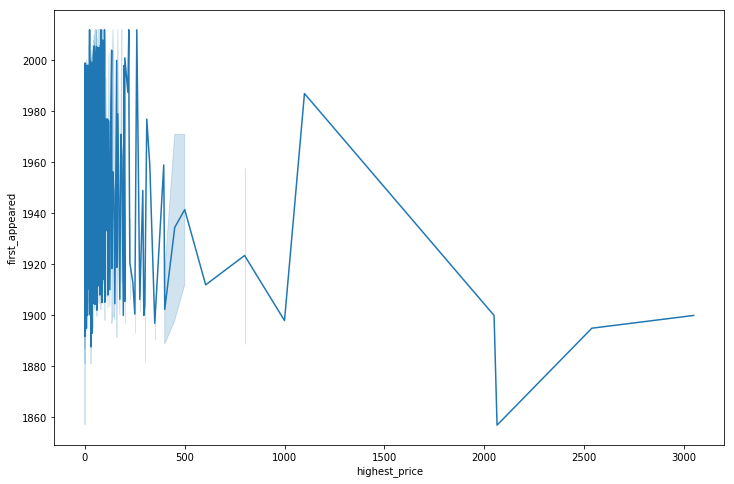

In [12]:
plt.figure(figsize=(12,8))
sns.lineplot(dish['highest_price'], dish['first_appeared'])

### lowest_price

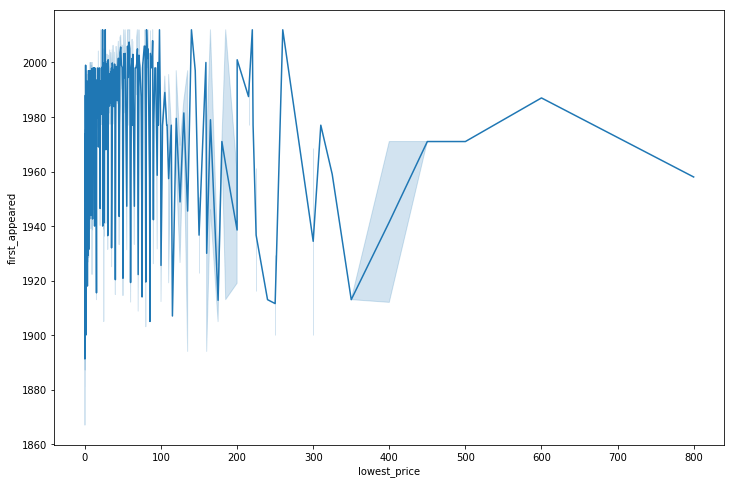

In [44]:
plt.figure(figsize=(12,8))
sns.lineplot(dish['lowest_price'], dish['first_appeared'])

In [45]:
dish[dish['lowest_price']> 200]

,id,name,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,names_cleaned
90732,113808,pintadon en cocotte fermiere,1,1,1906,1906,225.0,225.0,pintadon en cocotte fermiere
97721,122452,"cutter's ""old reserve""",1,1,1900,1900,250.0,250.0,cutter s old reserve
97740,122472,"old crow ""1888,"" our own bottling",1,1,1900,1900,250.0,250.0,old crow 1888 our own bottling
97759,122491,telford's liqueur scotch,1,1,1900,1900,250.0,250.0,telford s liqueur scotch
97761,122493,"king william scotch, very old",1,1,1900,1900,300.0,300.0,king william scotch very old
97762,122494,james hennesy & co.'s *** cognac,1,1,1900,1900,250.0,250.0,james hennesy co s cognac
97770,122502,martell's *** cognac,1,1,1900,1900,300.0,300.0,martell s cognac
97775,122508,tokajis hungarian,1,1,1900,1900,250.0,250.0,tokajis hungarian
98101,122916,"rudesheimer, auslese",1,1,1900,1900,250.0,250.0,rudesheimer auslese
98104,122919,"rauenthaler, berg auslese",1,1,1900,1900,300.0,300.0,rauenthaler berg auslese


In [100]:
dish

,id,name,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price,names_cleaned
0,1,consomme printaniere royal,8,8,1897,1927,0.20,0.4,consomme printaniere royal
1,2,chicken gumbo,111,117,1895,1960,0.10,0.8,chicken gumbo
2,3,tomato aux croutons,14,14,1893,1917,0.25,0.4,tomato aux croutons
3,4,onion au gratin,41,41,1900,1971,0.25,1.0,onion au gratin
4,5,st. emilion,66,68,1881,1981,0.00,18.0,st emilion
...,...,...,...,...,...,...,...,...,...
421212,513490,veal-tongue,1,1,1899,1899,NaN,NaN,veal tongue
421213,513491,truffle-sauce,1,1,1899,1899,NaN,NaN,truffle sauce
421224,513508,dagens assiett: pressylta med rödbetor,1,1,1955,1955,NaN,NaN,dagens assiett pressylta med r dbetor
421225,513509,stekt rödspätta med citron,1,1,1955,1955,NaN,NaN,stekt r dsp tta med citron


In [10]:
type(dish['last_appeared'][1])

numpy.int64

In [11]:
dish.to_csv('data/Dish_clean.csv')

## Menu

In [88]:
menu = pd.read_csv('data/Menu.csv')

In [89]:
# drop: keyword, language, location_type
menu = menu.drop(['keywords', 'language', 'location_type'], axis=1)

In [90]:
menu.head()

,id,name,sponsor,event,venue,place,physical_description,occasion,notes,call_number,date,location,currency,currency_symbol,status,page_count,dish_count
0,12463,NaN,HOTEL EASTMAN,BREAKFAST,COMMERCIAL,"HOT SPRINGS, AR",CARD; 4.75X7.5;,EASTER;,NaN,1900-2822,1900-04-15,Hotel Eastman,NaN,NaN,complete,2,67
1,12464,NaN,REPUBLICAN HOUSE,[DINNER],COMMERCIAL,"MILWAUKEE, [WI];",CARD; ILLUS; COL; 7.0X9.0;,EASTER;,WEDGEWOOD BLUE CARD; WHITE EMBOSSED GREEK KEY ...,1900-2825,1900-04-15,Republican House,NaN,NaN,complete,2,34
2,12465,NaN,NORDDEUTSCHER LLOYD BREMEN,FRUHSTUCK/BREAKFAST;,COMMERCIAL,DAMPFER KAISER WILHELM DER GROSSE;,CARD; ILLU; COL; 5.5X8.0;,NaN,"MENU IN GERMAN AND ENGLISH; ILLUS, STEAMSHIP A...",1900-2827,1900-04-16,Norddeutscher Lloyd Bremen,NaN,NaN,complete,2,84
3,12466,NaN,NORDDEUTSCHER LLOYD BREMEN,LUNCH;,COMMERCIAL,DAMPFER KAISER WILHELM DER GROSSE;,CARD; ILLU; COL; 5.5X8.0;,NaN,"MENU IN GERMAN AND ENGLISH; ILLUS, HARBOR SCEN...",1900-2828,1900-04-16,Norddeutscher Lloyd Bremen,NaN,NaN,complete,2,63
4,12467,NaN,NORDDEUTSCHER LLOYD BREMEN,DINNER;,COMMERCIAL,DAMPFER KAISER WILHELM DER GROSSE;,FOLDER; ILLU; COL; 5.5X7.5;,NaN,"MENU IN GERMAN AND ENGLISH; ILLUS, HARBOR SCEN...",1900-2829,1900-04-16,Norddeutscher Lloyd Bremen,NaN,NaN,complete,4,33


### event

In [91]:
menu['event'] = menu['event'].str.lower()

In [92]:
event_cleaned = cleaning(menu['event'])

In [93]:
menu['event_cleaned'] = event_cleaned

### date

In [94]:
year = []
for i in menu['date']:
    try:
        year_re = re.findall('\d{4}', i)
        year_re = int(year_re[0])
        year.append(year_re)
    except TypeError:
        year.append('Nan') 

In [95]:
menu['year'] = year
menu

,id,name,sponsor,event,venue,place,physical_description,occasion,notes,call_number,date,location,currency,currency_symbol,status,page_count,dish_count,event_cleaned,year
0,12463,NaN,HOTEL EASTMAN,breakfast,COMMERCIAL,"HOT SPRINGS, AR",CARD; 4.75X7.5;,EASTER;,NaN,1900-2822,1900-04-15,Hotel Eastman,NaN,NaN,complete,2,67,breakfast,1900
1,12464,NaN,REPUBLICAN HOUSE,[dinner],COMMERCIAL,"MILWAUKEE, [WI];",CARD; ILLUS; COL; 7.0X9.0;,EASTER;,WEDGEWOOD BLUE CARD; WHITE EMBOSSED GREEK KEY ...,1900-2825,1900-04-15,Republican House,NaN,NaN,complete,2,34,dinner,1900
2,12465,NaN,NORDDEUTSCHER LLOYD BREMEN,fruhstuck/breakfast;,COMMERCIAL,DAMPFER KAISER WILHELM DER GROSSE;,CARD; ILLU; COL; 5.5X8.0;,NaN,"MENU IN GERMAN AND ENGLISH; ILLUS, STEAMSHIP A...",1900-2827,1900-04-16,Norddeutscher Lloyd Bremen,NaN,NaN,complete,2,84,fruhstuck breakfast,1900
3,12466,NaN,NORDDEUTSCHER LLOYD BREMEN,lunch;,COMMERCIAL,DAMPFER KAISER WILHELM DER GROSSE;,CARD; ILLU; COL; 5.5X8.0;,NaN,"MENU IN GERMAN AND ENGLISH; ILLUS, HARBOR SCEN...",1900-2828,1900-04-16,Norddeutscher Lloyd Bremen,NaN,NaN,complete,2,63,lunch,1900
4,12467,NaN,NORDDEUTSCHER LLOYD BREMEN,dinner;,COMMERCIAL,DAMPFER KAISER WILHELM DER GROSSE;,FOLDER; ILLU; COL; 5.5X7.5;,NaN,"MENU IN GERMAN AND ENGLISH; ILLUS, HARBOR SCEN...",1900-2829,1900-04-16,Norddeutscher Lloyd Bremen,NaN,NaN,complete,4,33,dinner,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17540,35515,Hotel LaSalle,Hotel LaSalle,NaN,NaN,NaN,NaN,NaN,1 image,1913-0746_wotm,1913-09-24,Hotel LaSalle,NaN,NaN,complete,1,22,NaN,1913
17541,35516,Dennett's,Dennett's,NaN,NaN,NaN,NaN,NaN,1 image,1913-0747_wotm,1913-09-24,Dennett's,Dollars,$,complete,1,125,NaN,1913
17542,35517,The Cortlandt,The Cortlandt,NaN,NaN,NaN,NaN,NaN,1 image,1913-0748_wotm,1913-09-24,The Cortlandt,Dollars,$,complete,1,101,NaN,1913
17543,35518,Hotel Schynige Platte und Hotel Bellevue,Hotel Schynige Platte und Hotel Bellevue,NaN,NaN,NaN,NaN,NaN,4 images,1913-0749_wotm,1913-09-24,Hotel Schynige Platte und Hotel Bellevue,Swiss Francs,Fr,complete,4,161,NaN,1913


In [96]:
menu['year'].isna().sum()

0

In [97]:
menu = menu.drop(menu[menu['year'] == 'Nan'].index)
menu = menu.drop(menu[menu['year'] < 1851].index)
menu = menu.drop(menu[menu['year'] > 2012].index)
menu['year'].unique()

array([1900, 1888, 1865, 1892, 1901, 1890, 1906, 1905, 1907, 1891, 2005,
       2008, 1898, 1895, 1899, 1908, 1885, 1894, 1880, 1896, 1851, 1897,
       1866, 1882, 1893, 1889, 1883, 1881, 1887, 1886, 1884, 1856, 1928,
       1909, 1859, 1857, 1858, 1864, 2006, 1852, 1862, 1904, 1924, 1855,
       1861, 1854, 1853, 1873, 1986, 1987, 1990, 1985, 1989, 1988, 1969,
       1960, 1952, 1963, 1981, 1965, 1964, 1976, 1956, 1968, 1966, 1961,
       1974, 1972, 1983, 1962, 1971, 1953, 1977, 1869, 1959, 1954, 1957,
       1970, 1980, 1975, 1973, 1947, 1958, 1997, 1993, 1951, 1967, 1991,
       1995, 1982, 1999, 1996, 2012, 1979, 1955, 2000, 2004, 2001, 1992,
       1941, 1938, 1912, 1940, 1939, 1948, 1930, 1934, 1937, 1942, 1927,
       1920, 1931, 1925, 1936, 1943, 1915, 1910, 1935, 1944, 1929, 1932,
       1913, 1916, 1921, 1917, 1922, 1946, 1949, 1919, 1978, 1984, 1950,
       1994, 1998, 2002, 2003, 1945, 1933, 1926, 1918, 1914], dtype=object)

In [98]:
menu_dampfer = menu['place'].fillna('unknown')
place = menu_dampfer[menu_dampfer.str.contains('SHIP')]  # DAMPFER
place

24      EN ROUTE ABOARD PANAMA LINE STEAMSHIP CITY OF ...
35      EN ROUTE ABOARD PANAMA LINE STEAMSHIP CITY OF ...
94                                     STEAMSHIP IROQUOIS
928                              STEAMSHIP "CITY OF PARA"
929                    STEAMSHIP "CITY OF RIO DE JANEIRO"
2861    EN ROUTE ABOARD PANAMA LINE STEAMSHIP CITY OF ...
2865    EN ROUTE ABOARD PANAMA LINE STEAMSHIP CITY OF ...
2866    EN ROUTE ABOARD PANAMA LINE STEAMSHIP CITY OF ...
2869    EN ROUTE ABOARD PANAMA LINE STEAMSHIP CITY OF ...
3641    EN ROUTE ABOARD PANAMA LINE STEAMSHIP CITY OF ...
3642    EN ROUTE ABOARD PANAMA LINE STEAMSHIP CITY OF ...
3678                   STEAMSHIP "CITY OF RIO DE JANEIRO"
3681                   STEAMSHIP "CITY OF RIO DE JANEIRO"
4232    EN ROUTE ABOARD PANAMA LINE STEAMSHIP CITY OF ...
4634                 STEAMSHIP KAISER WILHELM DER GROSSER
4893                 STEAMSHIP KAISER WILHELM DER GROSSER
5036                    OLD SHIP HOTEL, BRIGHTON, ENGLAND
5082          

In [99]:
menu['occasion'] = menu['occasion'].str.lower()

In [100]:
occasion_cleaned = cleaning(menu['occasion'])

In [101]:
menu['occasion_cleaned'] = occasion_cleaned

In [102]:
menu['occasion_cleaned'].unique()

array(['easter ', 'NaN', 'anniversary ', 'daily ', 'daily',
       'other  complimentary  ', 'other  daily  ',
       'complimentary testimonial', 'anniversary    ', 'annual',
       'other  farewell ', 'other  annual dinner  ',
       '78th birthday of u s grant', ' ', 'conducted tour',
       'secular holiday  holiday', 'patriotic holiday ',
       'anniversaryersary', 'rite ', 'evening dinner',
       'other  possibly a private dinner  ', 'other  daily ', 'rite',
       'soc ', ' annual ', 'daily menu ', 'other  meeting   ',
       'religious holiday', 'pol ', 'dinner', 'daily menu',
       ' possibly a privately hosted party  ', 'festival', 'dailymenu',
       'secular holiday ', 'other  political  ',
       'tour to the pacific coast', 'complimentary dinner',
       'buffet service', 'other  meeting  ', 'other  trolley party  ',
       'other  soc  ', 'compl  to staff', 'dining car serv ',
       ' complimentary to commodore c  we  bliss ', 'other  reunion  ',
       '  reunion   

In [108]:
occasion_norm = []
for i in menu['occasion_cleaned']: 
    
    try:
        if 'other' in i:
            occasion_norm.append('other')
        elif 'daily' in i:
             occasion_norm.append('daily')
        elif 'dinner' in i: 
             occasion_norm.append('dinner')
        elif 'secular' in i: 
             occasion_norm.append('secular holiday')
        elif 'annual' in i:
             occasion_norm.append('annual')
        elif i == '?':
             occasion_norm.append('NaN')
        else: 
            occasion_norm.append(i)
    except TypeError:
        occasion_norm.append('NaN')

In [110]:
len(occasion_norm)

16953

In [111]:
menu.shape

(16953, 21)

In [112]:
menu['occasion_norm'] = occasion_norm

In [113]:
menu

,id,name,sponsor,event,venue,place,physical_description,occasion,notes,call_number,...,location,currency,currency_symbol,status,page_count,dish_count,event_cleaned,year,occasion_cleaned,occasion_norm
0,12463,NaN,HOTEL EASTMAN,breakfast,COMMERCIAL,"HOT SPRINGS, AR",CARD; 4.75X7.5;,easter;,NaN,1900-2822,...,Hotel Eastman,NaN,NaN,complete,2,67,breakfast,1900,easter,easter
1,12464,NaN,REPUBLICAN HOUSE,[dinner],COMMERCIAL,"MILWAUKEE, [WI];",CARD; ILLUS; COL; 7.0X9.0;,easter;,WEDGEWOOD BLUE CARD; WHITE EMBOSSED GREEK KEY ...,1900-2825,...,Republican House,NaN,NaN,complete,2,34,dinner,1900,easter,easter
2,12465,NaN,NORDDEUTSCHER LLOYD BREMEN,fruhstuck/breakfast;,COMMERCIAL,DAMPFER KAISER WILHELM DER GROSSE;,CARD; ILLU; COL; 5.5X8.0;,NaN,"MENU IN GERMAN AND ENGLISH; ILLUS, STEAMSHIP A...",1900-2827,...,Norddeutscher Lloyd Bremen,NaN,NaN,complete,2,84,fruhstuck breakfast,1900,NaN,NaN
3,12466,NaN,NORDDEUTSCHER LLOYD BREMEN,lunch;,COMMERCIAL,DAMPFER KAISER WILHELM DER GROSSE;,CARD; ILLU; COL; 5.5X8.0;,NaN,"MENU IN GERMAN AND ENGLISH; ILLUS, HARBOR SCEN...",1900-2828,...,Norddeutscher Lloyd Bremen,NaN,NaN,complete,2,63,lunch,1900,NaN,NaN
4,12467,NaN,NORDDEUTSCHER LLOYD BREMEN,dinner;,COMMERCIAL,DAMPFER KAISER WILHELM DER GROSSE;,FOLDER; ILLU; COL; 5.5X7.5;,NaN,"MENU IN GERMAN AND ENGLISH; ILLUS, HARBOR SCEN...",1900-2829,...,Norddeutscher Lloyd Bremen,NaN,NaN,complete,4,33,dinner,1900,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17540,35515,Hotel LaSalle,Hotel LaSalle,NaN,NaN,NaN,NaN,NaN,1 image,1913-0746_wotm,...,Hotel LaSalle,NaN,NaN,complete,1,22,NaN,1913,NaN,NaN
17541,35516,Dennett's,Dennett's,NaN,NaN,NaN,NaN,NaN,1 image,1913-0747_wotm,...,Dennett's,Dollars,$,complete,1,125,NaN,1913,NaN,NaN
17542,35517,The Cortlandt,The Cortlandt,NaN,NaN,NaN,NaN,NaN,1 image,1913-0748_wotm,...,The Cortlandt,Dollars,$,complete,1,101,NaN,1913,NaN,NaN
17543,35518,Hotel Schynige Platte und Hotel Bellevue,Hotel Schynige Platte und Hotel Bellevue,NaN,NaN,NaN,NaN,NaN,4 images,1913-0749_wotm,...,Hotel Schynige Platte und Hotel Bellevue,Swiss Francs,Fr,complete,4,161,NaN,1913,NaN,NaN


In [114]:
menu.to_csv('data/Menu_cleaned.csv')

## Menu-item

In [60]:
menu_item = pd.read_csv('data/MenuItem.csv')
menu_item.iloc[20:30]

,id,menu_page_id,price,high_price,dish_id,created_at,updated_at,xpos,ypos
20,23,1389,1.00,NaN,22.0,2011-03-29 14:09:01 UTC,2011-04-19 19:06:53 UTC,0.672857,0.309035
21,24,3079,1.50,3.0,23.0,2011-03-29 15:39:11 UTC,2011-04-13 15:26:01 UTC,0.081429,0.470795
22,25,1389,1.00,NaN,24.0,2011-03-29 15:42:52 UTC,2011-04-19 19:08:38 UTC,0.142857,0.368128
23,26,1389,0.75,NaN,25.0,2011-03-29 16:04:26 UTC,2011-04-19 19:08:52 UTC,0.397143,0.361739
24,27,1389,0.25,NaN,26.0,2011-03-29 21:54:46 UTC,2011-04-13 15:27:55 UTC,0.282857,0.229181
25,28,1389,0.25,NaN,27.0,2011-03-29 21:54:57 UTC,2011-04-19 04:33:02 UTC,0.574286,0.230778
26,30,1388,4.00,NaN,35733.0,2011-03-31 18:53:08 UTC,2011-04-28 04:42:35 UTC,0.100000,0.211111
27,31,12947,NaN,NaN,30.0,2011-03-31 20:12:00 UTC,2011-03-31 20:12:00 UTC,0.168571,0.260494
28,33,12947,NaN,NaN,7.0,2011-03-31 20:12:17 UTC,2011-03-31 20:12:17 UTC,0.765714,0.261516
29,34,130,NaN,NaN,31.0,2011-03-31 20:24:46 UTC,2011-03-31 20:24:46 UTC,0.170000,0.285441


## MenuPage

In [99]:
menu_page = pd.read_csv('data/MenuPage.csv')
menu_page

,id,menu_id,page_number,image_id,full_height,full_width,uuid
0,119,12460,1.0,1603595,7230.0,5428.0,510d47e4-2955-a3d9-e040-e00a18064a99
1,120,12460,2.0,1603596,5428.0,7230.0,510d47e4-2956-a3d9-e040-e00a18064a99
2,121,12460,3.0,1603597,7230.0,5428.0,510d47e4-2957-a3d9-e040-e00a18064a99
3,122,12460,4.0,1603598,7230.0,5428.0,510d47e4-2958-a3d9-e040-e00a18064a99
4,123,12461,1.0,1603591,7230.0,5428.0,510d47e4-2959-a3d9-e040-e00a18064a99
...,...,...,...,...,...,...,...
66932,77427,35526,6.0,5194216,2772.0,2341.0,cc70ae50-6212-0132-8b23-58d385a7bbd0
66933,77428,35526,7.0,5194217,2772.0,2301.0,cc844a40-6212-0132-6ead-58d385a7bbd0
66934,77429,35526,8.0,5194218,2763.0,2530.0,cc985890-6212-0132-9cd3-58d385a7bbd0
66935,77430,35526,1.0,5194219,5440.0,5237.0,e51c88c0-6212-0132-ef5e-58d385a7bbd0


In [ ]:
menu_page.groupby(['page_number']).count().head(20)